In [460]:
import numpy as np

## 4.1 NumPy的ndarray：一种多维数组对象

NumPy数组与 Python内置序列的性能比较，各个序列分别乘以2

包含一百万个整数的数组和一个等价的Python列表

In [461]:
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [462]:
%time my_arr2 = my_arr *2

Wall time: 1.97 ms


In [463]:
%time my_list2 = [i * 2 for i in my_list]

Wall time: 95.2 ms


数学运算

* shape 表示各维度大小的数组

* dtype 数组数据类型

In [464]:
data = np.random.rand(2, 3)

data

array([[0.83539965, 0.13101009, 0.09224323],
       [0.71766107, 0.17279876, 0.97466427]])

数组的每个元素都乘以10

In [465]:
data * 10

array([[8.35399646, 1.31010087, 0.92243228],
       [7.17661071, 1.72798763, 9.7466427 ]])

数组中每个元素都与自身相加

In [466]:
data + data

array([[1.67079929, 0.26202017, 0.18448646],
       [1.43532214, 0.34559753, 1.94932854]])

### 创建 ndarray

* np.array() 接受一切序列型的对象（包括其它数组），产生一个新的含有传入数据的NumPy数组

以一个列表的转换ndarray数组

In [467]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1, f"维度:{arr1.ndim}", f"尺度:{arr1.shape}", f"数据类型:{arr1.dtype}"

(array([6. , 7.5, 8. , 0. , 1. ]), '维度:1', '尺度:(5,)', '数据类型:float64')

而嵌套序列（比如由一组等长列表组成的列表）将会被转换为一个多维数组

In [468]:
data2 = [[1, 2, 3, 4], [-5, 0.5, 7, 34]]
arr2 = np.array(data2)
arr2, f"维度:{arr2.ndim}", f"尺度:{arr2.shape}", f"数据类型:{arr2.dtype}"

(array([[ 1. ,  2. ,  3. ,  4. ],
        [-5. ,  0.5,  7. , 34. ]]),
 '维度:2',
 '尺度:(2, 4)',
 '数据类型:float64')

除np.array之外，还有一些函数也可以新建数组。

zeros() 指定形状创建全0的数组

In [469]:
np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

ones() 指定形状创建全1的数组

In [470]:
np.ones((2, 5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

np.arange是Python内置函数range的数组版

In [471]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### ndarray的数据类型

* dtype（数据类型）是一个特殊的对象，它含有ndarray将一块内存解释为特定数据类型所需的信息

In [472]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr1.dtype

dtype('float64')

In [473]:
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr2.dtype

dtype('int32')

ndarray的astype方法将一个数组从一个dtype转换成另一个dtype

In [474]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int32')

In [475]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

如果将浮点数转换成整数，则小数部分将会被截取删除

In [476]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1], dtype=np.float64)
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [477]:
arr.astype(np.int64)

array([ 3, -1, -2,  0, 12, 10], dtype=int64)

如果某字符串数组表示的全是数字，也可以用astype将其转换为数值形式

In [478]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(np.float64)

array([ 1.25, -9.6 , 42.  ])

NumPy很聪明，它会将Python类型映射到等价的dtype上

In [479]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

还可以用简洁的类型代码来表示dtype

In [480]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

笔记：调用astype总会创建一个新的数组（一个数据的备份），即使新的dtype与旧的dtype相同。

### NumPy数组的运算

* 数组很重要，因为它使你不用编写循环即可对数据执行批量运算。NumPy用户称其为矢量化（vectorization）。

大小相等的数组之间的任何算术运算都会将运算应用到元素级

In [481]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr, arr + arr, arr - arr

(array([[1., 2., 3.],
        [4., 5., 6.]]),
 array([[ 2.,  4.,  6.],
        [ 8., 10., 12.]]),
 array([[0., 0., 0.],
        [0., 0., 0.]]))

数组 与标量的算术运算会将标量值传播到各个元素 (广播运算)

In [482]:
1 / arr, arr ** 0.5

(array([[1.        , 0.5       , 0.33333333],
        [0.25      , 0.2       , 0.16666667]]),
 array([[1.        , 1.41421356, 1.73205081],
        [2.        , 2.23606798, 2.44948974]]))

大小相同的数组之间的比较会生成布尔值数组

In [483]:
arr2 = np.array([[0., 4., 1.], [7., 6, 12.]])
arr2, arr2 > arr

(array([[ 0.,  4.,  1.],
        [ 7.,  6., 12.]]),
 array([[False,  True, False],
        [ True,  True,  True]]))

### 基本的索引和切片

* NumPy数组的索引是一个内容丰富的主题，因为选取数据子集或单个元素的方式有很多。

* 数组切片是原始数组的视图。这意味着数据不会被复制，视图上的任何修改都会直接反映到源数组上。

* 想要获得数组的备份而非视图时，可以使用 ndarray.copy()

* 二维数组中，各索引位置上的元素不再是标量而是一维数组

一维数组很简单。表面上看跟Python列表的功能差不多

In [484]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [485]:
arr[5]  # 下标为5的数据

5

In [486]:
arr[5:8]  # 下标5到8 的数据

array([5, 6, 7])

In [487]:
arr[5:8] = 12  # 将下标5到8的数据赋值为 12

In [488]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [489]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

当修改arr_slice中的值，变动也会体现在原始数组arr中

In [490]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

切片[ : ]会给数组中的所有值赋值

In [491]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

复制数组可以使用 ndarray.copy()

In [492]:
new_arr = arr[:3].copy()
new_arr[:] = 33
new_arr

array([33, 33, 33])

In [493]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

二维数组的索引，指向数组，而不是标量

In [494]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[0]

array([1, 2, 3])

二维数组选取单个元素，两种方式

In [495]:
arr2d[0][2], arr2d[2, 2]

(3, 9)

多维数组的索引和切片，2x2x3 的三维数组

In [496]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d, f"尺度:{arr3d.shape}"

(array([[[ 1,  2,  3],
         [ 4,  5,  6]],
 
        [[ 7,  8,  9],
         [10, 11, 12]]]),
 '尺度:(2, 2, 3)')

arr3d[0]是一个2×3数组

In [497]:
arr3d[0], f"尺度:{arr3d[0].shape}"

(array([[1, 2, 3],
        [4, 5, 6]]),
 '尺度:(2, 3)')

标量值和数组都可以被赋值给arr3d[0]

In [498]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [499]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

arr3d[1,0]可以访问索引以(1,0)开头的数据，第一行的第零列

In [500]:
arr3d[1, 0]

array([7, 8, 9])

也可以分两步来索引

In [501]:
x = arr3d[1]
x, x[0]

(array([[ 7,  8,  9],
        [10, 11, 12]]),
 array([7, 8, 9]))

注意，在上面所有这些选取数组子集的例子中，返回的数组都是视图。

### 切片索引

ndarray的切片语法跟Python列表这样的一维对象差不多

In [502]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [503]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

沿着第0轴（即第一个轴）切片的。也就是说，切片是沿着一个轴向选取元素的。

表达式arr2d[:2]可以被认为是“选取arr2d的前两行”

In [504]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

可以一次传入多个切片，就像传入多个索引那样

In [505]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

将整数索引和切片混合，可以得到低维度的切片。


例如，选取第二行的前两列

In [506]:
arr2d[1, :2]

array([4, 5])

还可以选择前两行的第三列

In [507]:
arr2d[:2, 2]

array([3, 6])

注意，“只有冒号”表示选取整个轴，因此你可以像下面这样只对高维轴进行切片

In [508]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

自然，对切片表达式的赋值操作也会被扩散到整个选区

In [509]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### 布尔型索引

假设有一个用于存储数据的数组以及一个存储姓名的数组（含有重复项）。

在这里，将使用numpy.random中的randn函数生成一些正态分布的随机数据

In [510]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)  # 7行4列的二维数组

In [511]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [512]:
data

array([[ 1.41511984, -0.69961318,  0.06767048,  1.38371196],
       [-0.23261935, -1.73385609, -0.50356849,  0.10695687],
       [-1.3626506 ,  0.26942995,  1.98168637, -0.2634727 ],
       [-1.59158477, -0.27663886,  0.3083193 ,  1.22837544],
       [ 0.49031745,  1.20480311, -1.08232265,  0.6250483 ],
       [ 2.34239087, -0.09582274, -0.65325166,  0.56172752],
       [-0.24771553,  0.85580499,  0.40226017,  0.6316192 ]])

假设每个名字都对应data数组中的一行，而我们想要选出对应于名字"Bob"的所有行。跟算术运算一样，数组的比较运算（如==）也是矢量化的。因此，对names和字符串"Bob"的比较运算将会产生一个布尔型数组

In [513]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

这个布尔型数组可用于数组索引

In [514]:
data[names == 'Bob']

array([[ 1.41511984, -0.69961318,  0.06767048,  1.38371196],
       [-1.59158477, -0.27663886,  0.3083193 ,  1.22837544]])

布尔型数组的长度必须跟被索引的轴长度一致。

布尔型数组的长度必须跟被索引的轴长度一致。

此外，还可以将布尔型数组跟切片、整数（或整数序列）混合使用

* 注意：如果布尔型数组的长度不对，布尔型选择就会出错，因此一定要小心。

In [515]:
# 选取 names == 'Bob' 的行，并索引了列
data[names == 'Bob', 2:]

array([[0.06767048, 1.38371196],
       [0.3083193 , 1.22837544]])

要选择除 "Bob" 以外的其他值，可以使用不等于符号（!=）

In [516]:
data[names != 'Bob']

array([[-0.23261935, -1.73385609, -0.50356849,  0.10695687],
       [-1.3626506 ,  0.26942995,  1.98168637, -0.2634727 ],
       [ 0.49031745,  1.20480311, -1.08232265,  0.6250483 ],
       [ 2.34239087, -0.09582274, -0.65325166,  0.56172752],
       [-0.24771553,  0.85580499,  0.40226017,  0.6316192 ]])

也可以通过 `~` 操作符对条件进行否定，`~` 操作符用来反转条件很好用

In [517]:
cond = names == 'Bob'
data[~cond]

array([[-0.23261935, -1.73385609, -0.50356849,  0.10695687],
       [-1.3626506 ,  0.26942995,  1.98168637, -0.2634727 ],
       [ 0.49031745,  1.20480311, -1.08232265,  0.6250483 ],
       [ 2.34239087, -0.09582274, -0.65325166,  0.56172752],
       [-0.24771553,  0.85580499,  0.40226017,  0.6316192 ]])

选取这三个名字中的两个需要组合应用多个布尔条件，使用&（和）、|（或）之类的布尔算术运算符即可

In [518]:
mask = (names == 'Bob') | (names == 'Will')
data[mask]

array([[ 1.41511984, -0.69961318,  0.06767048,  1.38371196],
       [-1.3626506 ,  0.26942995,  1.98168637, -0.2634727 ],
       [-1.59158477, -0.27663886,  0.3083193 ,  1.22837544],
       [ 0.49031745,  1.20480311, -1.08232265,  0.6250483 ]])

通过布尔型索引选取数组中的数据，将总是创建数据的副本，即使返回一模一样的数组也是如此。

> 注意：Python关键字and和or在布尔型数组中无效。要使用&与|。

通过布尔型数组设置值是一种经常用到的手段。将data中的所有负值都设置为0，可以这样

In [519]:
data[data < 0] = 0
data

array([[1.41511984, 0.        , 0.06767048, 1.38371196],
       [0.        , 0.        , 0.        , 0.10695687],
       [0.        , 0.26942995, 1.98168637, 0.        ],
       [0.        , 0.        , 0.3083193 , 1.22837544],
       [0.49031745, 1.20480311, 0.        , 0.6250483 ],
       [2.34239087, 0.        , 0.        , 0.56172752],
       [0.        , 0.85580499, 0.40226017, 0.6316192 ]])

通过一维布尔数组设置整行或列的值也很简单

In [520]:
data[names != 'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 0.        , 0.10695687],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [2.34239087, 0.        , 0.        , 0.56172752],
       [0.        , 0.85580499, 0.40226017, 0.6316192 ]])

这类二维数据的操作也可以用pandas方便的来做。

### 花式索引

花式索引（Fancy indexing）是一个NumPy术语，它指的是利用整数数组进行索引。

假设有一个8×4数组

In [521]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

为了以特定顺序选取行子集，只需传入一个用于指定顺序的整数列表或ndarray即可

In [522]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

使用负数索引将会从末尾开始选取行（最后一行的索引从 -1 开始，以此往前递减）

In [523]:
arr[[-3, -1, -7]]

array([[5., 5., 5., 5.],
       [7., 7., 7., 7.],
       [1., 1., 1., 1.]])

一次传入多个索引数组会有一点特别。它返回的是一个一维数组，其中的元素对应各个索引元组

In [524]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [525]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

最终选出的是元素(1,0)、(5,3)、(7,1)和(2,2)。无论数组是多少维的，花式索引总是一维的。

In [526]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

记住，花式索引跟切片不一样，它总是将数据复制到新数组中。

### 数组转置和轴对换

转置是重塑的一种特殊形式，它返回的是源数据的视图（不会进行任何复制操作）。

数组不仅有transpose方法，还有一个特殊的T属性

In [527]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [528]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

在进行矩阵计算时，经常需要用到该操作，比如利用np.dot计算矩阵内积

In [529]:
arr = np.random.randn(6, 3)
arr

array([[ 1.0612027 ,  0.25222519,  0.4647933 ],
       [-2.290176  , -0.0314047 , -0.37161667],
       [ 0.2898692 , -1.40540645, -0.65534327],
       [ 0.18060111,  0.23804082, -0.24234706],
       [-0.6734045 , -0.39368023, -0.35679092],
       [-1.45369603,  0.46164703,  0.67103227]])

In [530]:
np.dot(arr.T, arr)

array([[ 9.05440396, -0.43079767,  0.37536317],
       [-0.43079767,  2.46453664,  1.44247985],
       [ 0.37536317,  1.44247985,  1.41992274]])

对于高维数组，transpose需要得到一个由轴编号组成的元组才能对这些轴进行转置（比较费脑子）

In [531]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [532]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

这里，第一个轴被换成了第二个，第二个轴被换成了第一个，最后一个轴不变。

简单的转置可以使用.T，它其实就是进行轴对换而已。

ndarray还有一个swapaxes方法，它需要接受一对轴编号

In [533]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [534]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

swapaxes也是返回源数据的视图（不会进行任何复制操作）

## 4.2 通用函数：快速的元素级数组函数

通用函数（即ufunc）是一种对ndarray中的数据执行元素级运算的函数。

可以将其看做简单函数（接受一个或多个标量值，并产生一个或多个标量值）的矢量化包装器。

许多ufunc都是简单的元素级变体，如sqrt和exp：

In [535]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [536]:
# 计算数组每个元素的算术平方根
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [537]:
# 计算数组每个元素 e^x 的值
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

这些都是一元（unary）ufunc。

另外一些（如add或maximum）接受2个数组（也叫二元（binary）ufunc），并返回一个结果数组

In [538]:
x = np.random.randn(8)
y = np.random.randn(8)

In [539]:
x

array([-0.10795418,  0.27249745,  0.71200173,  0.90124138, -0.53968998,
        0.99126873,  0.89221422,  0.45837798])

In [540]:
y

array([-0.81377441,  0.91137508,  1.06347188, -0.61015538,  0.33955645,
       -0.50001159,  0.73247827,  0.07856754])

numpy.maximum 计算了x和y中元素级别(元素值)最大的元素

In [541]:
np.maximum(x, y)

array([-0.10795418,  0.91137508,  1.06347188,  0.90124138,  0.33955645,
        0.99126873,  0.89221422,  0.45837798])

虽然并不常见，但有些ufunc的确可以返回多个数组。

modf就是一个例子，它是Python内置函数divmod的矢量化版本，它会返回浮点数数组的小数和整数部分

In [542]:
arr = np.random.randn(7) * 5
arr

array([-1.79847245,  0.6463722 , -0.12908494, -0.16541851, -2.87166379,
        5.46332618, -7.21101329])

In [543]:
remainder, whole_part = np.modf(arr)

In [544]:
remainder

array([-0.79847245,  0.6463722 , -0.12908494, -0.16541851, -0.87166379,
        0.46332618, -0.21101329])

In [545]:
whole_part

array([-1.,  0., -0., -0., -2.,  5., -7.])

Ufuncs可以接受一个out可选参数，这样就能在数组原地进行操作

In [546]:
arr

array([-1.79847245,  0.6463722 , -0.12908494, -0.16541851, -2.87166379,
        5.46332618, -7.21101329])

In [547]:
np.sqrt(arr)

<ipython-input-547-b58949107b3d>:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr)


array([       nan, 0.80397276,        nan,        nan,        nan,
       2.33737592,        nan])

In [548]:
arr

array([-1.79847245,  0.6463722 , -0.12908494, -0.16541851, -2.87166379,
        5.46332618, -7.21101329])

In [549]:
np.sqrt(arr, arr)

<ipython-input-549-164954cb2c14>:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr, arr)


array([       nan, 0.80397276,        nan,        nan,        nan,
       2.33737592,        nan])

In [550]:
arr

array([       nan, 0.80397276,        nan,        nan,        nan,
       2.33737592,        nan])

## 4.3 利用数组进行数据处理

NumPy数组使你可以将许多种数据处理任务表述为简洁的数组表达式（否则需要编写循环）。用数组表达式代替循环的做法，通常被称为矢量化。一般来说，矢量化数组运算要比等价的纯Python方式快上一两个数量级（甚至更多），尤其是各种数值计算。

假设想要在一组值（网格型）上计算函数``sqrt(x^2+y^2)``。np.meshgrid函数接受两个一维数组，并产生两个二维矩阵（对应于两个数组中所有的(x,y)对）

In [551]:
points = np.arange(-5, 5, 0.01)  # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)

In [552]:
xs, xs.size

(array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        ...,
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]]),
 1000000)

In [553]:
ys, ys.size

(array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
        [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
        [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
        ...,
        [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
        [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
        [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]]),
 1000000)

现在，对该函数的求值运算就好办了，把这两个数组当做两个浮点数那样编写表达式即可

In [554]:
z = np.sqrt(xs ** 2 + ys ** 2)
z.size

1000000

用matplotlib创建了这个二维数组的可视化

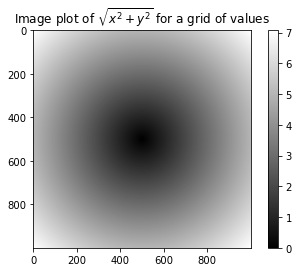

In [555]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray)
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.colorbar()

### 将条件逻辑表述为数组运算

numpy.where函数是三元表达式x if condition else y的矢量化版本。

假设有一个布尔数组和两个值数组

In [556]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

如果想要根据cond中的值选取xarr和yarr的值：当cond中的值为True时，选取xarr的值，否则从yarr中选取。

列表推导式的写法应该如下所示

In [557]:
results = [(x if c else y) for x, y, c in zip(xarr, yarr,cond)]
results

[1.1, 2.2, 1.3, 1.4, 2.5]

这有几个问题。第一，它对大数组的处理速度不是很快（因为所有工作都是由纯Python完成的）。第二，无法用于多维数组。

若使用np.where，则可以将该功能写得非常简洁：

In [558]:
results = np.where(cond, xarr, yarr)
results

array([1.1, 2.2, 1.3, 1.4, 2.5])

np.where的第二个和第三个参数不必是数组，它们都可以是标量值。

在数据分析工作中，where通常用于根据另一个数组而产生一个新的数组。

假设有一个由随机数据组成的矩阵，希望将所有大于 0值替换为2，其余值替换为－2。

利用np.where，则会非常简单

In [559]:
arr = np.random.randn(4, 4)
arr

array([[ 0.93735803,  0.23337388, -0.04504175,  0.87839907],
       [ 1.049855  , -0.51685939, -0.45059411, -0.71579386],
       [-0.16646126,  1.23289166,  2.69279378,  0.32006884],
       [ 0.09549624,  0.77171672,  0.21117095, -3.73173424]])

In [560]:
np.where(arr > 0, 2, -2)

array([[ 2,  2, -2,  2],
       [ 2, -2, -2, -2],
       [-2,  2,  2,  2],
       [ 2,  2,  2, -2]])

使用np.where，可以将标量和数组结合起来。

例如，使用常数2替换arr中所有正的值，而0和负数则保持不变

In [561]:
np.where(arr > 0, 2, arr)

array([[ 2.        ,  2.        , -0.04504175,  2.        ],
       [ 2.        , -0.51685939, -0.45059411, -0.71579386],
       [-0.16646126,  2.        ,  2.        ,  2.        ],
       [ 2.        ,  2.        ,  2.        , -3.73173424]])

传递给where的数组大小可以不相等，甚至可以是标量值。

### 数学和统计方法

可以通过数组上的一组数学函数对整个数组或某个轴向的数据进行统计计算。

sum、mean以及标准差std等聚合计算（aggregation，通常叫做约简（reduction））既可以当做数组的实例方法调用，也可以当做顶级NumPy函数使用。

生成了一些正态分布随机数据，然后做了聚类统计

In [562]:
arr = np.random.randn(5, 4)
arr

array([[-0.26869938,  0.24875634, -0.38867073, -0.3278302 ],
       [-1.21367525,  0.77700145,  0.0908256 ,  0.99232171],
       [ 0.32443966,  0.68316425, -0.04044398, -0.34293609],
       [ 1.01321149, -0.09465731, -0.58552869,  2.97056457],
       [-2.14671064, -1.12025941,  0.9157563 , -1.06995018]])

In [563]:
arr.mean()

0.020833975553171236

In [564]:
np.mean(arr)

0.020833975553171236

In [565]:
arr.sum()

0.4166795110634247

mean和sum这类的函数可以接受一个axis选项参数，用于计算该轴向上的统计值，最终结果是一个至少一维的数组

In [566]:
arr.mean(axis=1)

array([-0.18411099,  0.16161838,  0.15605596,  0.82589752, -0.85529098])

In [567]:
arr.sum(axis=0)

array([-2.29143413,  0.49400533, -0.0080615 ,  2.22216981])

这里，arr.mean(1)是“计算行的平均值”，arr.sum(0)是“计算每列的和”。

其他如cumsum和cumprod之类的方法则不聚合，而是产生一个由中间结果组成的数组

In [568]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()  # 每个元素前n项的和

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [569]:
arr.cumprod()  # 每个元素前n项的积

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

在多维数组中，累加函数（如cumsum）返回的是同样大小的数组，但是会根据每个低维的切片沿着标记轴计算部分聚类

In [570]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [571]:
arr.cumsum(axis=0)  # 对每列的元素计算累计和

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [572]:
arr.cumprod(axis=1)  # 对每行的元素求累计积

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

### 用于布尔型数组的方法

在上面这些方法中，布尔值会被强制转换为1（True）和0（False）。

因此，sum经常被用来对布尔型数组中的True值计数

In [573]:
arr = np.random.randn(100)

(arr > 0).sum()  # 求随机数组中大于0的个数

48

另外还有两个方法any和all，它们对布尔型数组非常有用。

any用于测试数组中是否存在一个或多个True，而all则检查数组中所有值是否都是True

In [574]:
bools = np.array([False, False, True, False])

bools.any()

True

In [575]:
bools.all()

False

这两个方法也能用于非布尔型数组，所有非0元素将会被当做True。

### 排序

跟Python内置的列表类型一样，NumPy数组也可以通过sort方法就地排序

In [576]:
arr = np.random.randn(6)
arr

array([ 1.33966965,  0.09479372,  1.14660714, -1.44570247, -1.3022902 ,
        0.99208257])

In [577]:
arr.sort()  # 默认升序
arr

array([-1.44570247, -1.3022902 ,  0.09479372,  0.99208257,  1.14660714,
        1.33966965])

多维数组可以在任何一个轴向上进行排序，只需将轴编号传给sort即可

In [578]:
arr = np.random.randn(5, 3)
arr

array([[ 0.3314518 , -0.99726518,  1.42966726],
       [ 1.13173707,  0.49135653,  1.12419689],
       [ 0.42680906, -0.32613247, -1.54725857],
       [ 0.88681574,  0.67205985, -0.1829816 ],
       [-0.11503972,  1.23663964,  0.2403152 ]])

In [579]:
arr.sort(axis=1)  # 对每行的数据排序
arr

array([[-0.99726518,  0.3314518 ,  1.42966726],
       [ 0.49135653,  1.12419689,  1.13173707],
       [-1.54725857, -0.32613247,  0.42680906],
       [-0.1829816 ,  0.67205985,  0.88681574],
       [-0.11503972,  0.2403152 ,  1.23663964]])

顶级方法np.sort返回的是数组的已排序副本，而就地排序则会修改数组本身。

计算数组分位数最简单的办法是对其进行排序，然后选取特定位置的值

In [580]:
large_arr = np.random.randn(1000)
large_arr.sort()

In [581]:
large_arr[int(0.05 * len(large_arr))]

-1.699490461408181

在pandas中还可以找到一些其他跟排序有关的数据操作（比如根据一列或多列对表格型数据进行排序）

### 唯一化以及其它的集合逻辑

NumPy提供了一些针对一维ndarray的基本集合运算。

最常用的可能要数np.unique了，它用于找出数组中的唯一值(去重)并返回已排序的结果

In [582]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [583]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

跟np.unique等价的纯Python代码来对比一下：

In [584]:
sorted(set(names))

['Bob', 'Joe', 'Will']

函数np.in1d用于测试一个数组中的值在另一个数组中的成员资格，返回一个布尔型数组

In [585]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

## 4.4 用于数组的文件输入输出

NumPy能够读写磁盘上的文本数据或二进制数据。

np.save和np.load是读写磁盘数组数据的两个主要函数。默认情况下，数组是以未压缩的原始二进制格式保存在扩展名为.npy的文件中的

In [586]:
arr = np.arange(10)
np.save('some_array', arr)

如果文件路径末尾没有扩展名.npy，则该扩展名会被自动加上。然后就可以通过np.load读取磁盘上的数组

In [587]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

通过np.savez可以将多个数组保存到一个未压缩文件中，将数组以关键字参数的形式传入即可

In [588]:
np.savez('array_archive.npz', a=arr, b=arr)

加载.npz文件时，会得到一个类似字典的对象，该对象会对各个数组进行延迟加载

In [589]:
arch = np.load('array_archive.npz')
arch['a'], arch['b']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

如果要将数据压缩，可以使用numpy.savez_compressed

In [590]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

## 4.5 线性代数（未完）

线性代数（如矩阵乘法、矩阵分解、行列式以及其他方阵数学等）是任何数组库的重要组成部分。不像某些语言（如MATLAB），通过*对两个二维数组相乘得到的是一个元素级的积，而不是一个矩阵点积。因此，NumPy提供了一个用于矩阵乘法的dot函数（既是一个数组方法也是numpy命名空间中的一个函数）

## 4.6 伪随机数生成

numpy.random模块对Python内置的random进行了补充，增加了一些用于高效生成多种概率分布的样本值的函数。

In [591]:
samples = np.random.normal(size=(4, 4))
samples

array([[-0.95674875, -1.34362301,  0.01068043, -0.79767366],
       [-0.22687906,  0.44422509, -0.40572046, -0.62304392],
       [ 0.63770547,  0.77195152,  0.50781003,  0.08026085],
       [ 0.21393136, -0.19694203, -0.63745093, -1.14010191]])

而Python内置的random模块则只能一次生成一个样本值。从下面的测试结果中可以看出，如果需要产生大量样本值，numpy.random快了不止一个数量级

In [592]:
from random import normalvariate
N = 1000000  # 一百万
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

981 ms ± 13.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [593]:
%timeit np.random.normal(size=N)

28.5 ms ± 703 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


这些都是伪随机数，是因为它们都是通过算法基于随机数生成器种子，在确定性的条件下生成的。可以用NumPy的np.random.seed更改随机数生成种子

In [594]:
# np.random.seed(1234)

numpy.random的数据生成函数使用了全局的随机种子。

要避免全局状态，可以使用numpy.random.RandomState，创建一个与其它隔离的随机数生成器

In [595]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

## 4.7 示例：随机漫步

通过模拟随机漫步来说明如何运用数组运算。

先来看一个简单的随机漫步的例子：从0开始，步长1和－1出现的概率相等。

下面是一个通过内置的random模块以纯Python的方式实现1000步的随机漫步

In [596]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

根据前100个随机漫步值生成的折线图

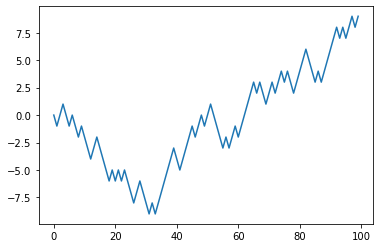

In [597]:
plt.plot(walk[:100])

其实这就是随机漫步中各步的累计和，可以用一个数组运算来实现。因此，用np.random模块一次性随机产生1000个“掷硬币”结果（即两个数中任选一个），将其分别设置为1或－1，然后计算累计和

In [598]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

有了这些数据之后，就可以沿着漫步路径做一些统计工作了，比如求取最大值和最小值

In [599]:
f"最小值: {walk.min()}   最大值: {walk.max()}"

'最小值: -22   最大值: 13'

现在来看一个复杂点的统计任务——首次穿越时间，即随机漫步过程中第一次到达某个特定值的时间。假设想要知道本次随机漫步需要多久才能距离初始0点至少10步远（任一方向均可）。np.abs(walk)>=10可以得到一个布尔型数组，它表示的是距离是否达到或超过10，而想要知道的是第一个10或－10的索引。可以用argmax来解决这个问题，它返回的是该布尔型数组第一个最大值的索引（True就是最大值）

In [600]:
(np.abs(walk) >= 10).argmax()

43

这里使用argmax并不是很高效，因为它无论如何都会对数组进行完全扫描。

在这个例子中，只要发现了一个True，就知道它是最大值了。

### 一次模拟多个随机漫步

如果希望模拟多个随机漫步过程（比如5000个），只需对上面的代码做一点点修改即可生成所有的随机漫步过程。只要给numpy.random的函数传入一个二元元组就可以产生一个二维数组，然后就可以一次性计算5000个随机漫步过程（一行一个）的累计和了

In [601]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks, f"尺度: {walks.shape}"

(array([[ -1,   0,  -1, ...,  44,  43,  44],
        [  1,   0,   1, ...,  16,  17,  18],
        [  1,   2,   1, ...,  34,  35,  36],
        ...,
        [ -1,   0,   1, ..., -14, -15, -16],
        [ -1,   0,   1, ..., -32, -33, -32],
        [  1,   0,  -1, ..., -24, -23, -24]], dtype=int32),
 '尺度: (5000, 1000)')

现在，来计算所有随机漫步过程的最大值和最小值

In [602]:
f"最大值：{walks.max()} 最小值：{walks.min()}"

'最大值：116 最小值：-111'

可视化 5000个随机漫步过程中的第一个过程前200步

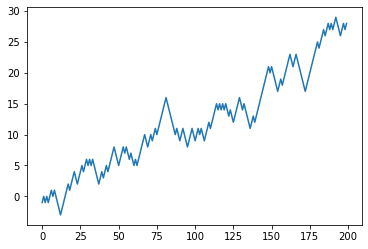

In [603]:
plt.plot(walks[0][:200])
plt.show()

得到这些数据之后，来计算30或－30的最小穿越时间。这里稍微复杂些，因为不是5000个过程都到达了30。可以用any方法来对此进行检查

In [604]:
hits30 = (np.abs(walks) >= 30).any(axis=1)
hits30

array([ True, False,  True, ..., False,  True, False])

In [605]:
hits30.sum()

3424

然后利用这个布尔型数组选出那些穿越了30（绝对值）的随机漫步（行），并调用argmax在轴1上获取穿越时间

In [606]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
crossing_times.mean()

505.41530373831773

尝试用其他分布方式得到漫步数据。只需使用不同的随机数生成函数即可，如normal用于生成指定均值和标准差的正态分布数据

In [607]:
steps = np.random.normal(loc=0.5, scale=0.25, size=(5000, 1000))
steps, f"尺度：{steps.shape}"

(array([[ 0.69994974,  0.6642495 ,  0.76711004, ...,  0.9755856 ,
          0.64774659,  0.18791815],
        [ 0.4551628 ,  0.21368441,  0.03080905, ...,  0.82762039,
          0.30241042,  0.83391648],
        [ 0.29271431,  0.87370674, -0.00576986, ...,  0.28662166,
          0.52561678,  0.28103178],
        ...,
        [ 0.59819569,  1.15355755,  0.30944252, ...,  0.50960674,
          0.53765687,  0.22792351],
        [ 0.34860533,  0.30333219, -0.03884892, ...,  0.76819982,
          0.56662471,  0.41704534],
        [ 0.20234337,  0.13541539,  0.16817491, ...,  0.79393917,
          0.35455606,  0.75391535]]),
 '尺度：(5000, 1000)')

## 4.8 结论

虽然大部分是使用pandas规整数据，但仍然会用到相似的基于数组的计算。